In [27]:
#import all helpers
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.feature_selection import GenericUnivariateSelect, RFE
from sklearn import metrics
from sklearn import linear_model, decomposition, datasets
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns # More snazzy plotting library
import itertools
from itertools import  product

#import regressors
#-----Ensemble---------------------
from sklearn.ensemble import       AdaBoostRegressor
from sklearn.ensemble import       BaggingRegressor
from sklearn.ensemble import       ExtraTreesRegressor
from sklearn.ensemble import       GradientBoostingRegressor
from sklearn.ensemble import       RandomForestRegressor

#----Generalized Linear models-----
from sklearn.linear_model import   ARDRegression
from sklearn.linear_model import   BayesianRidge
from sklearn.linear_model import   ElasticNet
from sklearn.linear_model import   HuberRegressor
from sklearn.linear_model import   Lars
from sklearn.linear_model import   Lasso
from sklearn.linear_model import   LassoLars
from sklearn.linear_model import   LinearRegression
from sklearn.linear_model import   PassiveAggressiveRegressor
from sklearn.linear_model import   Ridge
from sklearn.linear_model import   SGDRegressor
from sklearn.linear_model import   OrthogonalMatchingPursuit
from sklearn.linear_model import   RANSACRegressor
from sklearn.linear_model import   TheilSenRegressor

#---Nearest Neighbors----
from sklearn.neighbors import      KNeighborsRegressor
from sklearn.neighbors import      RadiusNeighborsRegressor


#----Neural Networks--------------- 
from sklearn.neural_network import MLPRegressor

#-----Support Vector Machines------
from sklearn.svm import            SVR
from sklearn.svm import            LinearSVR
from sklearn.svm import            NuSVR

#-----Decission Trees--------------
from sklearn.tree import           DecisionTreeRegressor
from sklearn.tree import           ExtraTreeRegressor

#----extras
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import         IsotonicRegression
from sklearn.kernel_ridge import     KernelRidge

#file_path =  "../dataset/movie_metadata_cleaned_tfidf_num_only_min.csv"
file_path =  "../dataset/no_imdb_names-count_cat-tf_184f.csv"
#file_path = "../dataset/movie_metadata_cleaned_no_vector_num_only.csv"

dta = pd.read_csv(file_path)
dta_clean = dta
#remove the null values, that is fill NaN with there - FIXME: Rihards, naive implementation
dta_clean = dta_clean.fillna(value=0, axis=1)
dta_clean = dta_clean.dropna()
dta_clean = dta_clean.drop('Unnamed: 0', axis=1)
#dta_clean.describe()

pd.options.display.max_columns = 500

dta_clean

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,production_budget,title_year,worldwide_gross,adamsandler,adamscott,alpacino,angelinajolie,annakendrick,annehathaway,anthonyhopkins,anthonymackie,antonyelchin,billcobbs,billmurray,bobhoskins,bradleycooper,bradpitt,briandepalma,brucegreenwood,brucemcgill,brucewillis,catherineohara,channingtatum,charlesdance,chazzpalminteri,cheechmarin,chlo,chrisevans,christianbale,cliftoncollinsjr,clinteastwood,colinfirth,dennisquaid,denzelwashington,dianekeaton,djimonhounsou,doncheadle,dwaynejohnson,emmastone,franklangella,garyoldman,gerardbutler,gracemoretz,harrisonford,helenmirren,hughjackman,jadapinkettsmith,jakegyllenhaal,jamesfranco,jamesgandolfini,jasonstatham,jeffbridges,jennifergarner,jenniferlawrence,jimbroadbent,jksimmons,johnnydepp,josephgordonlevitt,joshbrolin,joshhutcherson,katewinslet,keanureeves,kevinspacey,kirstendunst,kristenstewart,lauralinney,leonardodicaprio,liamneeson,lorettadevine,martinscorsese,mattdamon,matthewbroderick,matthewmcconaughey,merylstreep,michaelfassbender,michaelrapaport,mikeepps,millajovovich,morganfreeman,naomiwatts,natalieportman,nialong,nicolascage,oliverstone,oliviawilde,paulwalker,peterdinklage,philipseymourhoffman,queenlatifah,radhamitchell,raywinstone,rennyharlin,ridleyscott,riptorn,robertdeniro,robertdowneyjr,robinwilliams,ronhoward,ryangosling,ryanreynolds,samshepard,scarlettjohansson,scottglenn,seannwilliamscott,sethgreen,sissyspacek,spikelee,stephenroot,stevebuscemi,stevecarell,stevecoogan,stevensoderbergh,stevenspielberg,sylvesterstallone,timburton,timothyolyphant,tomcruise,tomhanks,tomwilkinson,viggomortensen,vindiesel,willferrell,williamfichtner,williamhurt,willsmith,woodyallen,zo,zooeydeschanel,color_blackandwhite,color_color,country_australia,country_canada,country_china,country_czechrepublic,country_denmark,country_france,country_germany,country_hongkong,country_india,country_ireland,country_italy,country_japan,country_mexico,country_netherlands,country_newzealand,country_southafrica,country_southkorea,country_spain,country_uk,country_usa,language_arabic,language_cantonese,language_english,language_french,language_german,language_hindi,language_italian,language_japanese,language_korean,language_mandarin,language_spanish,language_usa,raiting_approved,raiting_g,raiting_gp,raiting_nc17,raiting_notrated,raiting_passed,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_unrated
0,1000,942.0,862,1,4859,7000,0,178,425000000,2009.0,2783918982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.50000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.50000,0.0,0.0,0.50000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,29000,14000.0,787,1,45239,7000,0,194,200000000,1997.0,2207615668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.50000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.50000,0.0,0.0,0.50000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,3000,3000.0,878,1,8694,367,0,124,215000000,2015.0,1671640593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.50000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0

In [13]:
#clasify the data for the logistic regression
def label_gross (gross):
    if (gross < 1000000) : return 1
    elif ((gross >= 1000000) & (gross < 10000000)) : return 2
    elif ((gross >= 10000000) & (gross < 50000000)) : return 3
    elif ((gross >= 50000000) & (gross < 200000000)) : return 4
    elif (gross >= 200000000) : return 5
    
#y = dta_clean.worldwide_gross.apply (lambda gross: label_gross (gross))
y = dta_clean['worldwide_gross']
X = dta_clean.drop('worldwide_gross', axis=1)

X_col = X.columns
if False:
    nomalizer_scaler = preprocessing.Normalizer().fit(X)
    X = nomalizer_scaler.transform(X)
if False:
    standard_scaler = preprocessing.StandardScaler().fit(X)
    X = standard_scaler.transform(X)
        
#pd.DataFrame(X, columns=X_col).describe()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#model = SVR(kernel='rbf', verbose=2)

#model = LinearRegression()
#model = LogisticRegression()

#model = DecisionTreeRegressor()
#model = DecisionTreeClassifier()

#model = BayesianRidge()
#model = RidgeClassifier()

#model = KNeighborsRegressor()
#model = KNeighborsClassifier()

model = GradientBoostingRegressor()
#from sklearn.linear_model import   ARDRegression
#model = GradientBoostingClassifier()

#model = AdaBoostRegressor()
#model = AdaBoostClassifier()

#model = LinearSVR()
#model = LinearSVC()

#model = SVR(kernel='rbf')
#model = SVC(kernel='rbf')

#model = MLPRegressor(solver='lbfgs',  max_iter=1000)
#model = MLPClassifier(solver='lbfgs',  max_iter=1000)
#model = ExtraTreesRegressor()
#model.fit(X_train, y_train)
# check the accuracy on the training set
#model.predict(X_test)
#LR_1.score(X_1, y_1)
#model.score(X_test, y_test)
#score_re = {}
#scorers = ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']
#for scoring in scorers:
#    try:
#        print(scoring)
#        score_re[scoring] = cross_val_score(model, X, y, scoring=scoring)
#    except (ValueError, AttributeError): 
#        continue
#model = GradientBoostingRegressor()
#X.describe()
#X, _X_dummy, y, _y_dummy = train_test_split(X, y, test_size=0)
#model.coef_ 

In [14]:
from sklearn.preprocessing import FunctionTransformer,PolynomialFeatures
def dummy(X):   return X
DummyTransformer = FunctionTransformer(dummy)
LogarithmicFeatures = FunctionTransformer(np.log1p)
#X = DummyTransformer.fit_transform(X,y)
#X = preprocessing.Normalizer().fit_transform(X)
first  = DummyTransformer
second = PolynomialFeatures()
#first  = DummyTransformer
#second = DummyTransformer
model = GradientBoostingRegressor()
pipe = Pipeline(steps=[('first', first), ('second', second), ('model', model)])
#pd.DataFrame(pipe.fit_transform(X,y)).describe()
est = GridSearchCV(pipe, dict(second__degree = [2]), verbose=2, cv=5, n_jobs=4)
#est.fit(X,y)


In [70]:
#est.best_score_
transform = dict(transform__das = [40,2],
                 transform__fa = ["aa", "asb"]
                )
model = dict(model__degree = [1,2],
             model__sumthin = ["a", "b"]
            )
#print (n_samples)
#print (n_features)

def poly(X, pw):
    vector = X[:,10:]
    res    = X[:,:10]
    X      = X[:,:10]

    for power in range(2,pw + 1):
        res = np.concatenate((res, np.power(X, power)), axis=1)
    return np.concatenate((res, vector), axis=1)

def log(X):
    df_t = pd.DataFrame(X[:,:10])
    X_t = df_t.replace(0, 1/math.e)
    return np.concatenate((X, np.log(X_t)), axis=1)

PolyFeatures = FunctionTransformer(poly, kw_args = {"pw": 10})
frame = pd.DataFrame(PolyFeatures.fit_transform(X))
frame


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
0,1000.0,942.0,862.0,1.0,4859.0,7000.0,0.0,178.0,425000000.0,2009.0,1.000000e+06,887364.0,743044.0,1.0,2.360988e+07,49000000.0,0.0,31684.0,1.806250e+17,4036081.0,1.000000e+09,8.358969e+08,6.405039e+08,1.0,1.147204e+11,3.430000e+11,0.0,5639752.0,7.676563e+25,8.108487e+09,1.000000e+12,7.874149e+11,5.521144e+11,1.0,5.574265e+14,2.401000e+15,0.0,1.003876e+09,3.262539e+34,1.628995e+13,1.000000e+15,7.417448e+14,4.759226e+14,1.0,2.708535e+18,1.680700e+19,0.0,1.786899e+11,1.386579e+43,3.272651e+16,1.000000e+18,6.987236e+17,4.102453e+17,1.0,1.316077e+22,1.176490e+23,0.0,3.180680e+13,5.892961e+51,6.574756e+19,1.000000e+21,6.581976e+20,3.536314e+20,1.0,6.394820e+25,8.235430e+26,0.0,5.661611e+15,2.504509e+60,1.320868e+23,1.000000e+24,6.200222e+23,3.048303e+23,1.0,3.107243e+29,5.764801e+30,0.0,1.007767e+18,1.064416e+69,2.653625e+26,1.000000e+27,5.840609e+26,2.627637e+26,1.0,1.509809e+33,4.035361e+34,0.0,1.793825e+20,4.523768e+77,5.331132e+29,1.000000e+30,5.501854e+29,2.265023e+29,1.0,7.336163e+36,2.824752e+38,0.0,3.193008e+22,1.922602e+86,1.071024e+33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.50000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.50000,0.0,0.0,0.50000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,29000.0,14000.0,787.0,1.0,45239.0,7000.0,0.0,194.0,200000000.0,1997.0,8.410000e+08,196000000.0,619369.0,1.0,2.046567e+09,49000000.0,0.0,37636.0,4.000000e+16,3988009.0,2.438900e+13,2.744000e+12,4.874434e+08,1.0,9.258465e+13,3.430000e+11,0.0,7301384.0,8.000000e+24,7.964054e+09,7.072810e+17,3.841600e+16,3.836180e+11,1.0,4.188437e+18,2.401000e+15,0.0,1.416468e+09,1.600000e+33,1.590422e+13,2.051115e+22,5.378240e+20,3.019073e+14,1.0,1.894807e+23,1.680700e+19,0.0,2.747949e+11,3.200000e+41,3.176072e+16,5.948233e+26,7.529536e+24,2.376011e+17,1.0,8.571917e+27,1.176490e+23,0.0,5.331021e+13,6.400000e+49,6.342616e+19,1.724988e+31,1.054135e+29,1.869920e+20,1.0,3.877850e+32,8.235430e+26,0.0,1.034218e+16,1.280000e+58,1.266620e+23,5.002464e+35,1.475789e+33,1.471627e+23,1.0,1.754300e+37,5.764801e+30,0.0,2.006383e+18,2.560000e+66,2.529441e+26,1.450715e+40,2.066105e+37,1.158171e+26,1.0,7.936280e+41,4.035361e+34,0.0,3.892383e+20,5.120000e+74,5.051293e+29,4.207072e+44,2.892547e+41,9.114804e+28,1.0,3.590294e+46,2.824752e+38,0.0,7.551223e+22,1.024000e+83,1.008743e+33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

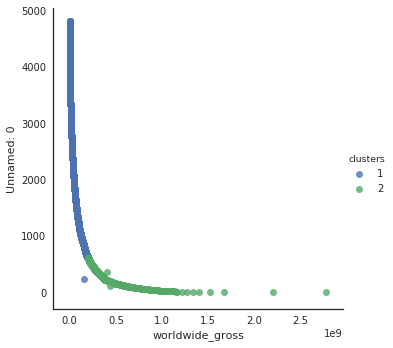

In [60]:
def label_gross_2 (gross):
    if (gross < 200000000) : return 1
    elif (gross >= 200000000) : return 2

def label_gross_3 (gross):
    if (gross < 10000000) : return 1
    elif ((gross >= 10000000) & (gross < 300000000)) : return 2
    elif (gross >= 300000000) : return 3

def label_gross_4 (gross):
    if (gross < 5000000) : return 1
    elif ((gross >= 5000000) & (gross < 50000000)) : return 2
    elif ((gross >= 50000000) & (gross < 350000000)) : return 3
    elif (gross >= 350000000) : return 4

def label_gross_5 (gross):
    if (gross < 1000000) : return 1
    elif ((gross >= 1000000) & (gross < 25000000)) : return 2
    elif ((gross >= 25000000) & (gross < 100000000)) : return 3
    elif ((gross >= 100000000) & (gross < 400000000)) : return 4
    elif (gross >= 400000000) : return 5


%matplotlib inline
file_plot = "../dataset/movie_metadata_cleaned_no_vector_num_only.csv"
sns.set(style="white", color_codes=True)
df = pd.read_csv(file_plot)
df = df.dropna()
#from sklearn.cluster import AffinityPropagation
#af = AffinityPropagation().fit(df.drop('worldwide_gross', axis=1))
df["clusters"] = df.worldwide_gross.apply (lambda gross: label_gross_2 (gross))
#x_plot = preprocessing.Normalizer().fit_transform(df["worldwide_gross"])
#df["worldwide_gross"] = x_plot.reshape((-1, 1))
#df.sort(['worldwide_gross'], ascending=[True, False], inplace=True)
sns.lmplot(x="worldwide_gross", y="Unnamed: 0", data=df, hue="clusters", fit_reg=False)
#sns.pairplot(df, hue="clusters")
#pd.DataFrame()



In [46]:
from sklearn.feature_selection import GenericUnivariateSelect, RFE

#len(X.columns)
##by default polynomical tranform adds new features n_features^pol + comb(pol,n_feeatures^pol-1)
#pol = PolynomialFeatures(degree = 3, include_bias = False, interaction_only=True).fit(X)
#print(pol.n_input_features_)
#print(pol.n_output_features_)

n_samples, n_features = X.shape
def get_powers_list(n_samples, n_features, n):
    base_arr = [{"pw":2},{"pw":3},{"pw":4}]
    max_pw = math.ceil(n_samples/n_features)
    step = math.floor((max_pw-4) / n)
    extra_arr = [{"pw":power} for power in range(4 + step, max_pw, step)]
    if  n_samples/n_features < 2:
        res = [{"pw":1}]
    elif max_pw - 1 == 2:
        res = [{"pw":2}]
    elif max_pw - 1 == 3:
        res = [{"pw":2}, {"pw":3}]
    elif max_pw - 1 == 4:
        res = [{"pw":2},{"pw":3},{"pw":4}]
    else :
        res = base_arr + extra_arr
    return res

def get_components_list(n_features, lst):
    lst = lst + [{"pw": 0.1},{"pw": 0.4},{"pw": 0.5},{"pw": 0.8}]
    lst = sorted(list(map(lambda x: math.floor(x["pw"]*n_features), lst)) + [1, 3, 5], reverse=True)
    lst[0] = lst[0]-1
    lst_n = [n for n in lst if n < 3321]
    if len(lst_n) < len(lst):
        lst_n = [3320] + lst_n 
    return lst_n


#get_components_list(n_features,get_components_list(n_features, [{"pw":2}, {"pw":1}])t_powers_list(n_samples, n_features, 3))

get_components_list(n_features,get_powers_list(n_samples, n_features, 3))

tuples_of_data = [(y,X), (y,X)]

for ind, tupl in enumerate(tuples_of_data):
    y_crr,x_crr = tupl
    print(ind)

0
1


In [33]:
np.reciprocal(np.logspace(-4, 4, 3))

array([  1.00000000e+04,   1.00000000e+00,   1.00000000e-04])

In [47]:
def label_gross_5 (gross):
    if (gross < 1000000) : return 1
    elif ((gross >= 1000000) & (gross < 25000000)) : return 2
    elif ((gross >= 25000000) & (gross < 100000000)) : return 3
    elif ((gross >= 100000000) & (gross < 400000000)) : return 4
    elif (gross >= 400000000) : return 5
    
label_gross_5.__name__

'label_gross_5'